Definition de la méthode RK4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#derivee1(t,z)=z
#derivee2(t,z,theta)=-q*z-w**2*theta


#VFINAL 
# Méthode RK4
def RK42(start, end, step, Y0, Z0, ode,ordre):
    '''
        Application de la méthode d'Euler
    '''
    # Création du tableau temps
    #interval = end - start                     # Intervalle
    #num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.arange(start, end, step)    # Tableau temps t

    # Initialisation du tableau F
    Y = np.zeros(t.size)
    Z = np.zeros(t.size)

    # Condition initiale
    Y[0] = Y0 #derivee 2e y
    Z[0] = Z0 #derivee 1ere z

    # Boucle for
    for i in range(t.size - 1):
        #Méthode de Simpson pour RK4
        k1 = ode(t[i],Y[i],Z[i])[0]
        l1 = ode(t[i],Y[i],Z[i])[1]

        k2 = ode(t[i]+0.5*step,Y[i]+0.5*step*k1,Z[i]+0.5*step*l1)[0]
        l2 = ode(t[i]+0.5*step,Y[i]+0.5*step*k1,Z[i]+0.5*step*l1)[1]

        k3 = ode(t[i]+0.5*step,Y[i]+0.5*step*k2,Z[i]+0.5*step*l2)[0]
        l3 = ode(t[i]+0.5*step,Y[i]+0.5*step*k2,Z[i]+0.5*step*l2)[1]

        k4 = ode(t[i]+step,Y[i]+step*k3,Z[i]+step*l3)[0]
        l4 = ode(t[i]+step,Y[i]+step*k3,Z[i]+step*l3)[1]

        

        Y[i + 1] = Y[i] + step/6 * (k1 + 2*k2 + 2*k3 + k4) #valeur fonction intermědiaire
        Z[i + 1] = Z[i] + step/6 * (l1 + 2*l2 + 2*l3 + l4 ) #valeur de la fonction cherchée

    # Argument de sortie
    return t, Y, Z #La fonction solution est l'array F -> Y dans la def de RK42 -- nettoyer le code

$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$
et qui dans le cas des petits angles se simplifie :
$$\sin\theta\approx\theta\quad\Rightarrow\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$

$q=1$, $q=2$, $q=5\mathrm{~s^{-1}}$

$\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$ et un pas de temps $\mathrm{d}t=0.05\mathrm{~s}$ pour $t$ allant de $0$ à $20\mathrm{~s}$.

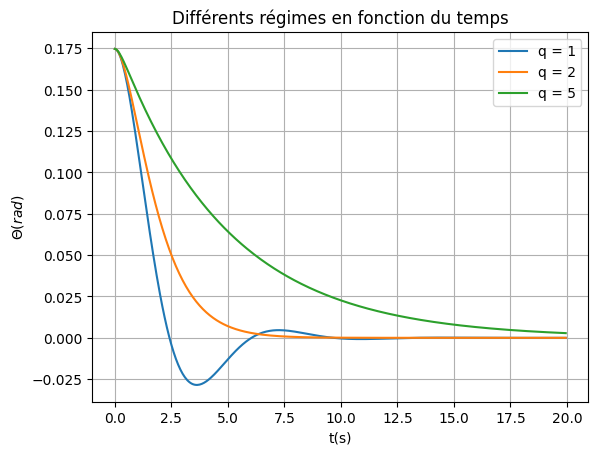

In [3]:
def ode1(t,y,z,omega=1): #q est défini dans la boucle
    yp=z
    zp= -q*z-omega**2*y
    return np.array([yp,zp])

for q in [1,2,5]:
    t,F,G = RK42(0,20,0.05,np.radians(10),0,ode1,2)

    plt.plot(t,F,"-", label="q = {}".format(q))

plt.legend()
plt.xlabel("t(s)")
plt.ylabel("$\Theta(rad)$")
plt.title("Différents régimes en fonction du temps")
plt.grid()

## Force d'excitation

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t). $$

$F_e = 1 rad s^{-1}$, $\Omega_e=\frac{2\Omega}{3}$.

Text(0.5, 1.0, "Solution pour le cas avec une force d'excitation")

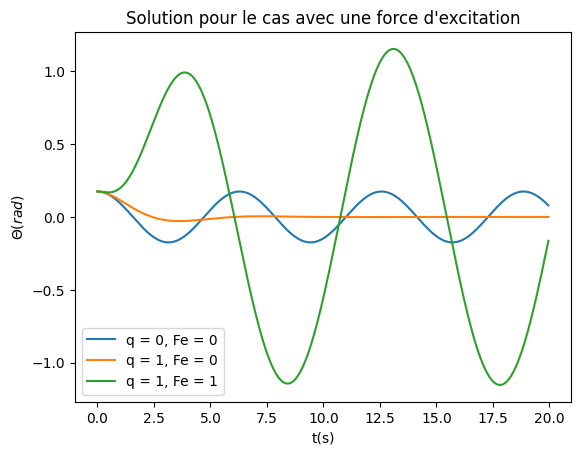

In [4]:
def ode2(t,y,z,omega=1): #Fe et q sont définis dans la boucle
    yp=z
    zp= Fe*np.sin(2*omega*t/3)-q*z-omega**2 *y
    return np.array([yp,zp])

for q,Fe in [(0,0),(1,0),(1,1)]:
    t,F,G = RK42(0,20,0.05,np.radians(10),0,ode2,2)

    plt.plot(t,F,"-",label="q = {}, Fe = {}".format(q,Fe))

plt.legend()
plt.xlabel("t(s)")
plt.ylabel("$\Theta(rad)$")
plt.title("Solution pour le cas avec une force d'excitation")

On trace les trajectoires dans l'espace des phases $\left(\theta,\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$

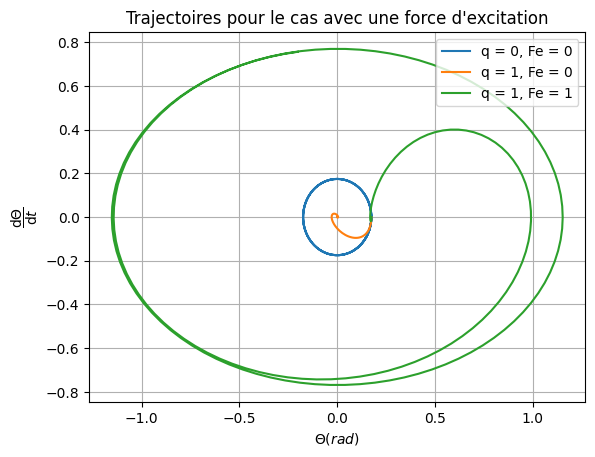

In [5]:
for q,Fe in [(0,0),(1,0),(1,1)]:
    t,F,G = RK42(0,20,0.1,np.radians(10),0,ode2,2)

    plt.plot(F,G,"-",label="q = {}, Fe = {}".format(q,Fe))

plt.legend()
plt.xlabel("$\Theta(rad)$")
plt.ylabel("$\dfrac{\mathrm{d}\Theta}{\mathrm{d}t}$")
plt.title("Trajectoires pour le cas avec une force d'excitation")
plt.grid()

## Mouvement chaotique

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\sin\theta=F_e\sin(\Omega_e t) $$

Afin d'illustrer ce comportement, on se placera dans les conditions suivantes : $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$, $\Omega_e=2\Omega/3$, $q=0.5\mathrm{~s^{-1}}$. 

$F_e=\{1.4,1.44,1.465,1.5\}\mathrm{~rad\cdot s^{-2}}$.

Text(0.5, 1.0, 'Solution pour le mouvement chaotique en fonction du temps')

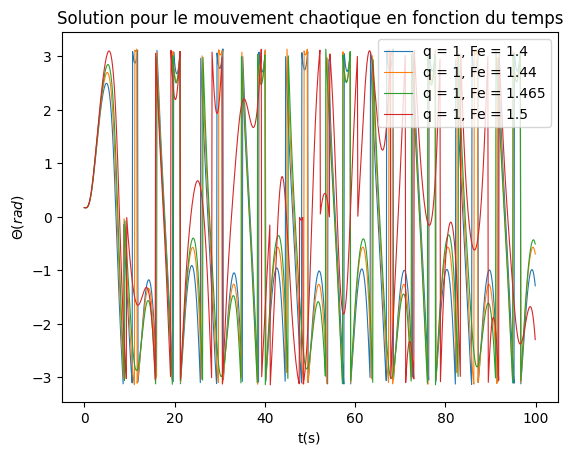

In [6]:
def ode3(t,y,z,omega=1,q=0.5): #Fe est défini dans la boucle for avant l'appel de la fonction RK4
    yp=z
    zp= Fe*np.sin(2*omega*t/3)-q*z-omega**2 * np.sin(y)
    return np.array([yp,zp])


for Fe in [1.4,1.44,1.465,1.5]:

    t,F,G = RK42(0,100,0.1,np.radians(10),0,ode3,2)

    #On normalise le tableau de theta pour que les valeurs soient entre [-pi,pi]

    F[F>np.pi] = F[F>np.pi]%(2*np.pi) - np.pi
    F[F<-np.pi] = F[F<-np.pi]%(2*np.pi) - np.pi


    plt.plot(t,F,"-",linewidth = 0.8, label="q = {}, Fe = {}".format(q,Fe))


plt.legend()
plt.xlabel("t(s)")
plt.ylabel("$\Theta(rad)$")
plt.title("Solution pour le mouvement chaotique en fonction du temps")

Dans le cas $F_e=1.5\mathrm{~rad\cdot s^{-2}}$, calculez l'évolution de $\theta(t)$ pour deux conditions initiales très proches l'une de l'autre : $\theta(t=0)=10\mathrm{~°}$ et $\theta(t=0)=9.999\mathrm{~°}$. Tracez la valeur absolue de la différence entre les deux solutions en fonctions du temps en échelle semi-logarithmique

Text(0.5, 1.0, 'Valeur absolue de la différence des solution \n pour $F_e=1,5$ et $\\Theta(t=0)=10\\mathrm{~°}$ et $\\Theta(t=0)=9.999\\mathrm{~°}$')

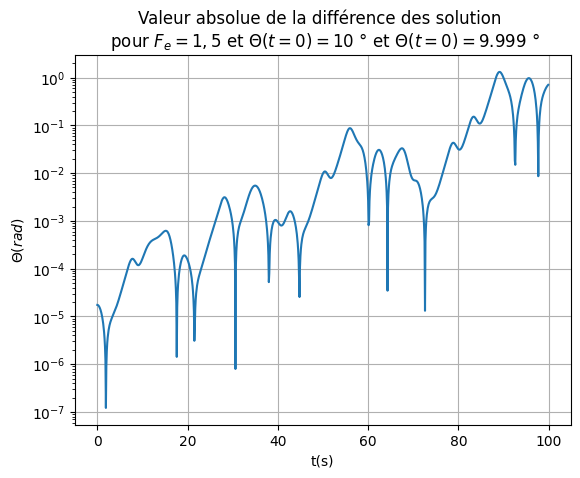

In [7]:
# Fe fixé
Fe = 1.5

#on appelle RK4 pour les deux conditions initiales

t,F1,G = RK42(0,100,0.1,np.radians(10),0,ode3,2)
_,F2,_ = RK42(0,100,0.1,np.radians(9.999),0,ode3,2)

#on plot la val abs de la différence

plt.plot(t,np.abs(F1-F2),"-")
plt.semilogy()
plt.grid()
plt.xlabel("t(s)")
plt.ylabel("$\Theta(rad)$")
plt.title("Valeur absolue de la différence des solution \n pour $F_e=1,5$ et $\Theta(t=0)=10\mathrm{~°}$ et $\Theta(t=0)=9.999\mathrm{~°}$")
